<a href="https://colab.research.google.com/github/xuziyue/tensorflow-models/blob/main/cnn_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from absl import logging
logging.set_verbosity(logging.ERROR)

In [5]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(origin=_URL, fname="flower_photos.tgz", extract=True)

228818944/228813984 [==============================] - 2s 0us/step


In [7]:
base_dir = os.path.join(os.path.dirname(zip_file), "flower_photos")

In [8]:
!find $base_dir -type d -print

/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/tulips


In [9]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [10]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [11]:
!find $base_dir -type d -print

/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/val
/root/.keras/datasets/flower_photos/val/dandelion
/root/.keras/datasets/flower_photos/val/daisy
/root/.keras/datasets/flower_photos/val/sunflowers
/root/.keras/datasets/flower_photos/val/roses
/root/.keras/datasets/flower_photos/val/tulips
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/train
/root/.keras/datasets/flower_photos/train/dandelion
/root/.keras/datasets/flower_photos/train/daisy
/root/.keras/datasets/flower_photos/train/sunflowers
/root/.keras/datasets/flower_photos/train/roses
/root/.keras/datasets/flower_photos/train/tulips
/root/.keras/datasets/flower_photos/tulips


In [12]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [13]:
batch_size = 100
IMG_SHAPE = 150

In [18]:
image_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True,
                               rotation_range=45,
                               zoom_range=0.5,
                               width_shift_range=0.15,
                               height_shift_range=0.15)

train_data_gen = image_gen.flow_from_directory(directory=train_dir,
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        target_size=(IMG_SHAPE, IMG_SHAPE),
                                                        class_mode='categorical')

Found 2935 images belonging to 5 classes.


In [16]:
train_data_gen[0][0][0].shape

(150, 150, 3)

In [21]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

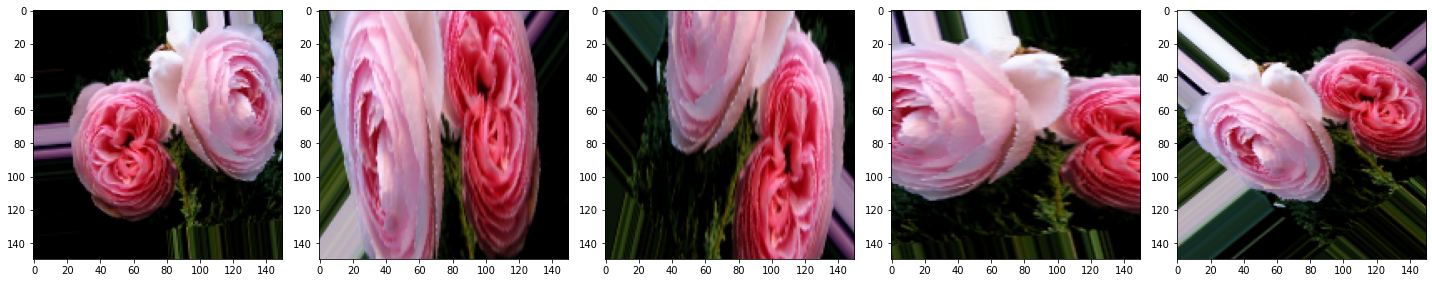

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [23]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(directory=val_dir,
                                                 batch_size=batch_size,
                                                 shuffle=False,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='categorical')

Found 735 images belonging to 5 classes.


In [26]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
          tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dense(5, activation='softmax')])

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])